# Decision tree

## Criterion Entropy

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import *
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix


In [ ]:
data =pd.read_csv('Gender_Classification_Data.csv')

In [ ]:
data.head()

,gender,height,weight,age
0,female,166.835558,64.238722,38
1,female,166.321934,67.165489,65
2,male,193.424782,89.342636,67
3,female,167.027904,67.637666,55
4,male,191.822253,93.985117,29


In [ ]:
data.isna().sum()

gender    0
height    0
weight    0
age       0
dtype: int64

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   gender  10000 non-null  object 
 1   height  10000 non-null  float64
 2   weight  10000 non-null  float64
 3   age     10000 non-null  int64  
dtypes: float64(2), int64(1), object(1)
memory usage: 312.6+ KB


In [ ]:
data.describe()

,height,weight,age
count,10000.000000,10000.000000,10000.000000
mean,177.492357,77.532014,43.446300
std,14.119292,11.689473,15.138112
min,144.481109,34.171822,18.000000
25%,164.998420,68.922954,30.000000
50%,176.358023,76.671571,43.000000
75%,190.092636,85.438872,57.000000
max,217.483664,120.290552,69.000000


In [ ]:
y=data['gender']

In [ ]:
x=data.drop(['gender'],axis=1)

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=0)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.fit_transform(x_test)

classifier=DecisionTreeClassifier(criterion='entropy',random_state=0)
fitted=classifier.fit(x_train,y_train)

In [ ]:
y_pred=classifier.predict(x_test)

In [ ]:
y_pred

array(['male', 'female', 'female', ..., 'male', 'female', 'male'],
      dtype=object)

In [ ]:
cm=confusion_matrix(y_test,y_pred)
cm

array([[1448,   14],
       [  50, 1488]])

[Text(0.5152064732142857, 0.9722222222222222, 'x[0] <= -0.111\nentropy = 1.0\nsamples = 7000\nvalue = [3538, 3462]'),
 Text(0.16880580357142858, 0.9166666666666666, 'x[0] <= -0.565\nentropy = 0.146\nsamples = 3500\nvalue = [3427, 73]'),
 Text(0.03571428571428571, 0.8611111111111112, 'x[1] <= 0.875\nentropy = 0.019\nsamples = 2742\nvalue = [2737, 5]'),
 Text(0.017857142857142856, 0.8055555555555556, 'x[1] <= 0.387\nentropy = 0.005\nsamples = 2705\nvalue = [2704, 1]'),
 Text(0.008928571428571428, 0.75, 'entropy = 0.0\nsamples = 2565\nvalue = [2565, 0]'),
 Text(0.026785714285714284, 0.75, 'x[1] <= 0.389\nentropy = 0.061\nsamples = 140\nvalue = [139, 1]'),
 Text(0.017857142857142856, 0.6944444444444444, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.03571428571428571, 0.6944444444444444, 'entropy = 0.0\nsamples = 139\nvalue = [139, 0]'),
 Text(0.05357142857142857, 0.8055555555555556, 'x[0] <= -0.726\nentropy = 0.494\nsamples = 37\nvalue = [33, 4]'),
 Text(0.044642857142857144, 0.75

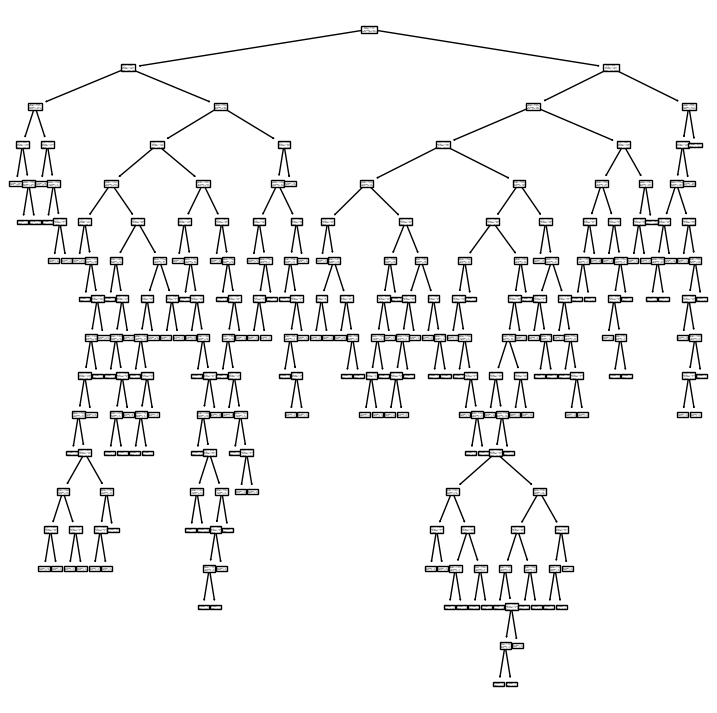

In [ ]:
plt.figure(figsize=(9,9))
from sklearn import tree
tree.plot_tree(fitted)

In [ ]:
y_pred_train=classifier.predict(x_train)

In [ ]:
from sklearn.metrics import accuracy_score,classification_report
print('Model accuracy with entropy: ',accuracy_score(y_test,y_pred))
print('Model accuracy with train set: ',accuracy_score(y_train,y_pred_train))

Model accuracy with entropy:  0.9786666666666667
Model accuracy with train set:  1.0


In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

      female       0.97      0.99      0.98      1462
        male       0.99      0.97      0.98      1538

    accuracy                           0.98      3000
   macro avg       0.98      0.98      0.98      3000
weighted avg       0.98      0.98      0.98      3000



# Criterion Gini

In [ ]:
gini_classifier=DecisionTreeClassifier(criterion='gini',max_depth=4,random_state=0)
gini_fitted=gini_classifier.fit(x_train,y_train)
y_pred_gini=gini_classifier.predict(x_test)
y_pred_gini

array(['male', 'female', 'female', ..., 'male', 'female', 'male'],
      dtype=object)

[Text(0.4732142857142857, 0.9, 'x[0] <= -0.111\ngini = 0.5\nsamples = 7000\nvalue = [3538, 3462]'),
 Text(0.23214285714285715, 0.7, 'x[1] <= 1.208\ngini = 0.041\nsamples = 3500\nvalue = [3427, 73]'),
 Text(0.14285714285714285, 0.5, 'x[0] <= -0.221\ngini = 0.031\nsamples = 3472\nvalue = [3417, 55]'),
 Text(0.07142857142857142, 0.3, 'x[1] <= 0.274\ngini = 0.019\nsamples = 3360\nvalue = [3327, 33]'),
 Text(0.03571428571428571, 0.1, 'gini = 0.007\nsamples = 3044\nvalue = [3034, 10]'),
 Text(0.10714285714285714, 0.1, 'gini = 0.135\nsamples = 316\nvalue = [293, 23]'),
 Text(0.21428571428571427, 0.3, 'x[1] <= -0.135\ngini = 0.316\nsamples = 112\nvalue = [90, 22]'),
 Text(0.17857142857142858, 0.1, 'gini = 0.131\nsamples = 85\nvalue = [79, 6]'),
 Text(0.25, 0.1, 'gini = 0.483\nsamples = 27\nvalue = [11, 16]'),
 Text(0.32142857142857145, 0.5, 'x[0] <= -0.671\ngini = 0.459\nsamples = 28\nvalue = [10, 18]'),
 Text(0.2857142857142857, 0.3, 'gini = 0.0\nsamples = 8\nvalue = [8, 0]'),
 Text(0.3571428

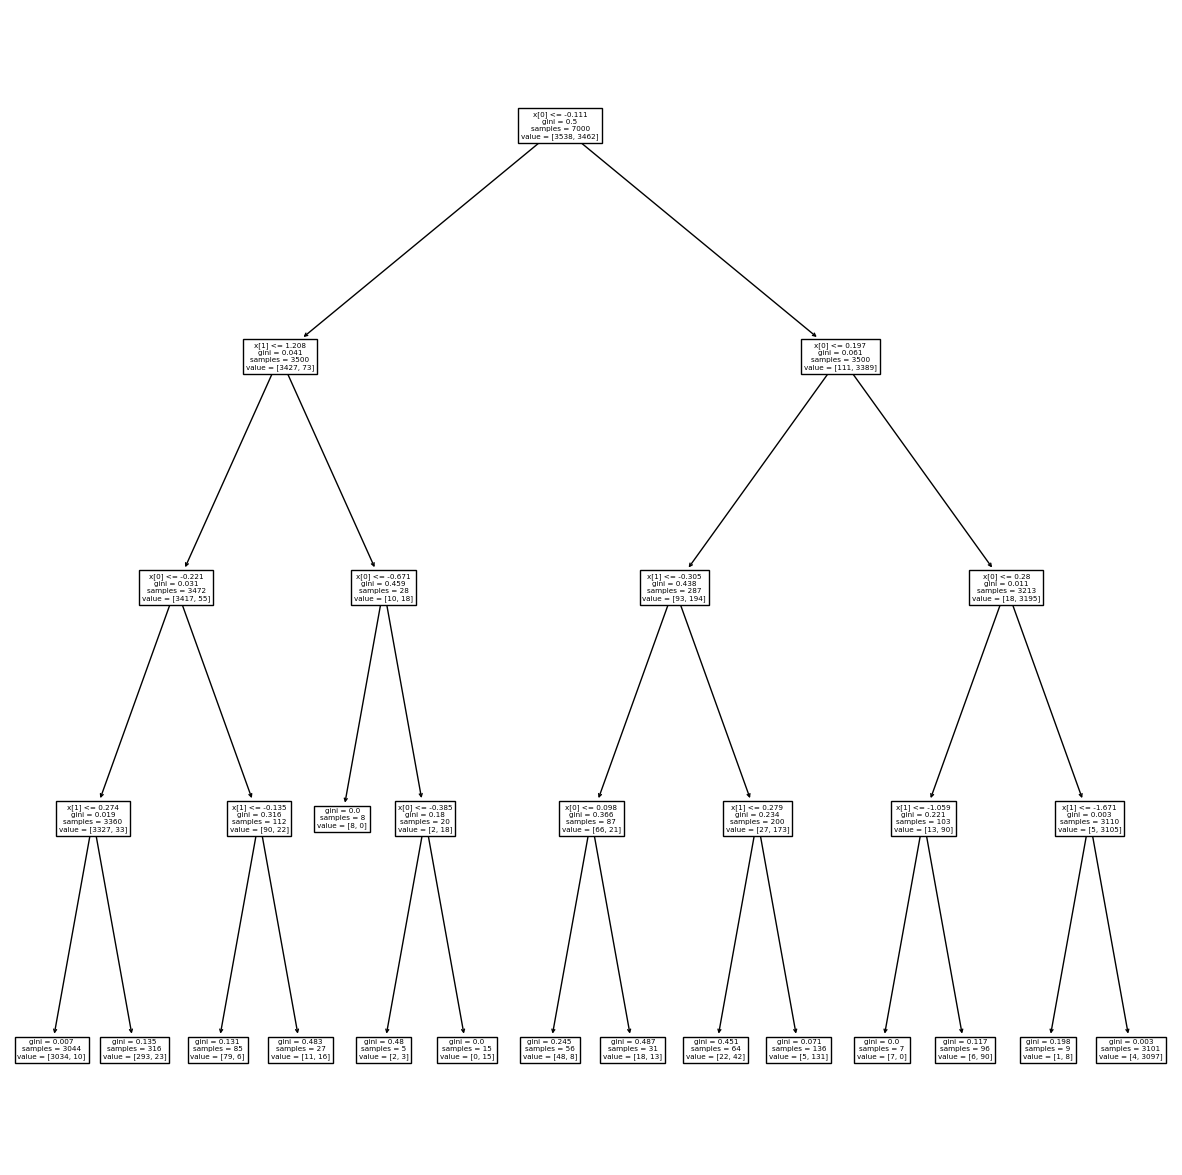

In [ ]:
plt.figure(figsize=(15,15))
tree.plot_tree(gini_fitted)

In [ ]:
y_pred_gini_train=gini_classifier.predict(x_train)
print('Model accuracy: ',accuracy_score(y_test,y_pred_gini))
print('Model accuracy with train set: ',accuracy_score(y_train,y_pred_gini_train))

Model accuracy:  0.9803333333333333
Model accuracy with train set:  0.9841428571428571


In [ ]:
print(classification_report(y_test,y_pred_gini))

              precision    recall  f1-score   support

      female       0.98      0.98      0.98      1462
        male       0.98      0.98      0.98      1538

    accuracy                           0.98      3000
   macro avg       0.98      0.98      0.98      3000
weighted avg       0.98      0.98      0.98      3000

